In [32]:
# pip install pandas numpy matplotlib seaborn scikit-learn xgboost streamlit

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

In [3]:
# Load datasets
data = "AmesHousing.csv"
df = pd.read_csv(data)

# Print first rows and shape 
print(f"Dataset has been loaded sucessfully with {df.shape[0]} rows, {df.shape[1]} columns.")
print(df.head())

Dataset has been loaded sucessfully with 2930 rows, 82 columns.
   Order        PID  MS SubClass MS Zoning  Lot Frontage  Lot Area Street  \
0      1  526301100           20        RL         141.0     31770   Pave   
1      2  526350040           20        RH          80.0     11622   Pave   
2      3  526351010           20        RL          81.0     14267   Pave   
3      4  526353030           20        RL          93.0     11160   Pave   
4      5  527105010           60        RL          74.0     13830   Pave   

  Alley Lot Shape Land Contour  ... Pool Area Pool QC  Fence Misc Feature  \
0   NaN       IR1          Lvl  ...         0     NaN    NaN          NaN   
1   NaN       Reg          Lvl  ...         0     NaN  MnPrv          NaN   
2   NaN       IR1          Lvl  ...         0     NaN    NaN         Gar2   
3   NaN       Reg          Lvl  ...         0     NaN    NaN          NaN   
4   NaN       IR1          Lvl  ...         0     NaN  MnPrv          NaN   

  Misc Val

In [4]:
# Check column names and data types
print(f"\n Dataset information: ")
df.info()

# Summary statistics for numerical columns 
print(f"\n Descriptive Statistics: ")
print(df.describe())


 Dataset information: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 82 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order            2930 non-null   int64  
 1   PID              2930 non-null   int64  
 2   MS SubClass      2930 non-null   int64  
 3   MS Zoning        2930 non-null   object 
 4   Lot Frontage     2440 non-null   float64
 5   Lot Area         2930 non-null   int64  
 6   Street           2930 non-null   object 
 7   Alley            198 non-null    object 
 8   Lot Shape        2930 non-null   object 
 9   Land Contour     2930 non-null   object 
 10  Utilities        2930 non-null   object 
 11  Lot Config       2930 non-null   object 
 12  Land Slope       2930 non-null   object 
 13  Neighborhood     2930 non-null   object 
 14  Condition 1      2930 non-null   object 
 15  Condition 2      2930 non-null   object 
 16  Bldg Type        2930 non-null   obj

In [5]:
# Check for missing values 
print("\n Missing values: ")
missing = df.isnull().sum()
missing = missing[missing > 0].sort_values(ascending=False)
print(missing)

# Check for duplicate rows 
duplicates = df.duplicated().sum()
print(f"\n Duplicate rows: {duplicates}")

# Skewness for all numerical columns
print(df.skew(numeric_only=True).sort_values(ascending=False))


 Missing values: 
Pool QC           2917
Misc Feature      2824
Alley             2732
Fence             2358
Mas Vnr Type      1775
Fireplace Qu      1422
Lot Frontage       490
Garage Cond        159
Garage Qual        159
Garage Finish      159
Garage Yr Blt      159
Garage Type        157
Bsmt Exposure       83
BsmtFin Type 2      81
Bsmt Cond           80
Bsmt Qual           80
BsmtFin Type 1      80
Mas Vnr Area        23
Bsmt Half Bath       2
Bsmt Full Bath       2
BsmtFin SF 1         1
Garage Cars          1
Garage Area          1
Total Bsmt SF        1
Bsmt Unf SF          1
BsmtFin SF 2         1
Electrical           1
dtype: int64

 Duplicate rows: 0
Misc Val           21.999788
Pool Area          16.939142
Lot Area           12.820898
Low Qual Fin SF    12.118162
3Ssn Porch         11.403795
Kitchen AbvGr       4.313825
BsmtFin SF 2        4.139978
Enclosed Porch      4.014446
Screen Porch        3.957467
Bsmt Half Bath      3.940795
Mas Vnr Area        2.606985
Open Por


 Outlier summary across all numeric columns: 
                 # of Outliers
Enclosed Porch             459
BsmtFin SF 2               351
Screen Porch               256
Overall Cond               252
MS SubClass                208
Mas Vnr Area               200
Lot Frontage               187
Bsmt Half Bath             175
Open Porch SF              159
SalePrice                  137
Kitchen AbvGr              134
Lot Area                   127
Total Bsmt SF              123
Misc Val                   103
Bedroom AbvGr               78
Gr Liv Area                 75
Wood Deck SF                67
Bsmt Unf SF                 56
TotRms AbvGrd               51
1st Flr SF                  43
Garage Area                 42
Low Qual Fin SF             40
3Ssn Porch                  37
Garage Cars                 17
BsmtFin SF 1                15
Fireplaces                  13
Pool Area                   13
Year Built                   9
2nd Flr SF                   8
Full Bath              

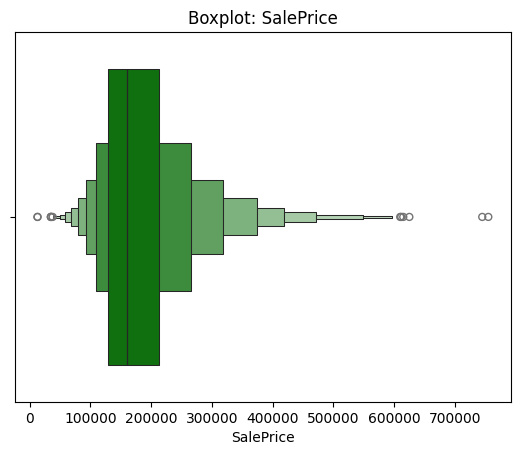

In [6]:
# Detect outliers across all numeric columns
def detect_outliers(df):
    numeric_cols = df.select_dtypes(include=[np.number]).columns
    outlier_summary = {}

    for col in numeric_cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR
        outliers = df[(df[col] < lower) | (df[col] > upper)]

        if len(outliers) > 0:
            outlier_summary[col] = len(outliers)

    return pd.DataFrame.from_dict(outlier_summary, orient='index', columns=['# of Outliers']).sort_values(by='# of Outliers', ascending=False)

# Result 
outlier_report = detect_outliers(df)
print("\n Outlier summary across all numeric columns: ")
print(outlier_report)

# Visualize outliers using boxplot
sns.boxenplot(x=df['SalePrice'], color='green')
plt.title('Boxplot: SalePrice')
plt.show()

Should you remove the outliers or transform??

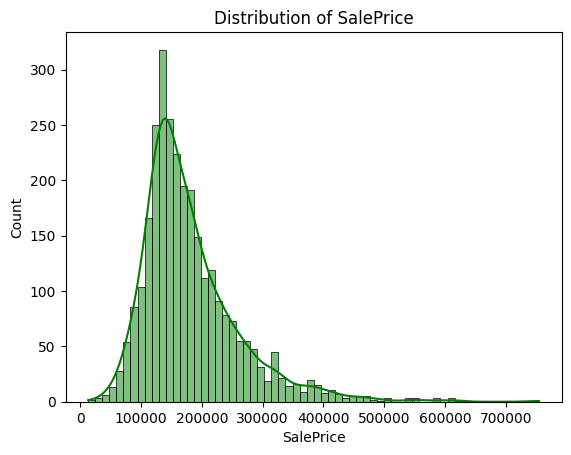

In [7]:
# Visualizing the distribution 
sns.histplot(df['SalePrice'], kde = True, color='green')
plt.title("Distribution of SalePrice")
plt.show()

In [8]:
# Check skewness  
print("Skewness: ", df['SalePrice'].skew())
print("kurtosis: ", df['SalePrice'].kurt())

Skewness:  1.7435000757376466
kurtosis:  5.118899951130896


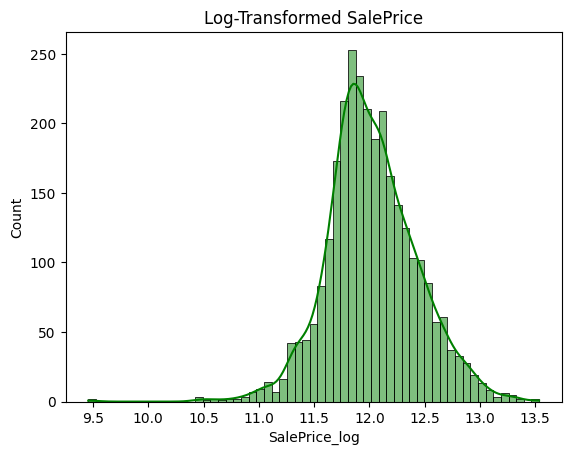

In [9]:
# Log transformation 
df['SalePrice_log'] = np.log1p(df['SalePrice'])

# Visualizing log-transform SalePrice
sns.histplot(df['SalePrice_log'], kde = True, color='green')
plt.title("Log-Transformed SalePrice")
plt.show()

Top 10 features positively correlated with SalePrice_log: 
 SalePrice_log     1.000000
SalePrice         0.946304
Overall Qual      0.825645
Gr Liv Area       0.695863
Garage Cars       0.675318
Garage Area       0.651132
Total Bsmt SF     0.625099
Year Built        0.615485
1st Flr SF        0.602629
Year Remod/Add    0.586153
Garage Yr Blt     0.580502
Name: SalePrice_log, dtype: float64


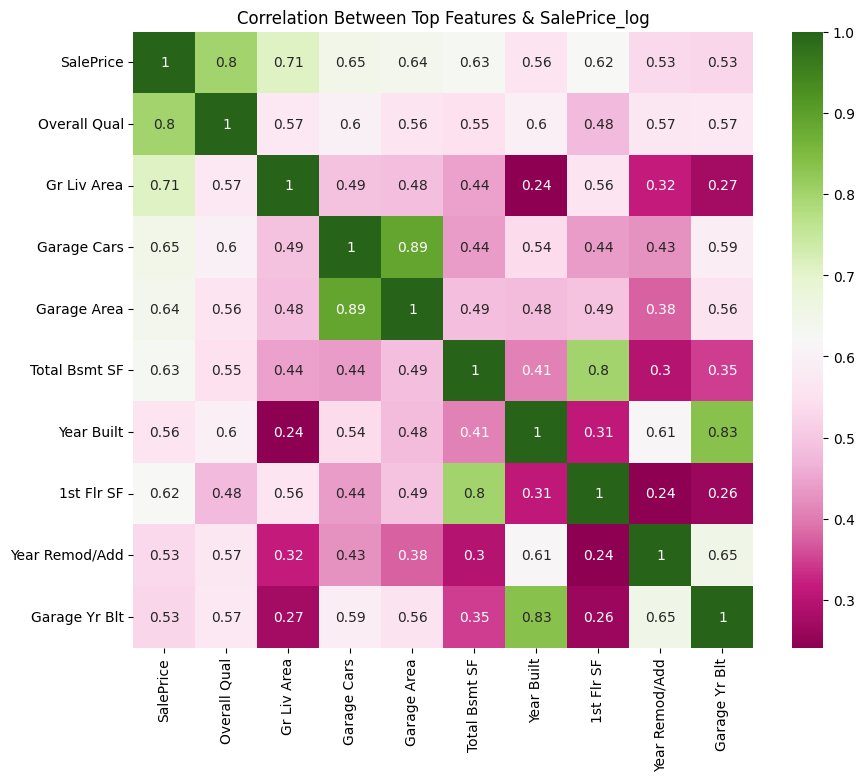

In [10]:
# Correlation with SalePrice

# Numeric columns
numeric_df = df.select_dtypes(include=[np.number])

# Correlation with target
corr = numeric_df.corr()['SalePrice_log'].sort_values(ascending = False)
print("Top 10 features positively correlated with SalePrice_log: \n", corr.head(11))

# Visualizing top correlation features 
top_corr_features = corr[1:11].index
plt.figure(figsize=(10,8))
sns.heatmap(df[top_corr_features].corr(), annot=True, cmap="PiYG")
plt.title("Correlation Between Top Features & SalePrice_log")
plt.show()

In [11]:
# Split features based on their dtypes
continuous_features = []
categorical_features = []

for feature in top_corr_features:
    unique_vals = df[feature].nunique()

    if df[feature].dtype in ['int64', 'float64']:
        if unique_vals > 15:
            continuous_features.append(feature)
        else:
            categorical_features.append(feature)

print("Continuous Features: ", continuous_features)
print("Categorical Features: ", categorical_features)

Continuous Features:  ['SalePrice', 'Gr Liv Area', 'Garage Area', 'Total Bsmt SF', 'Year Built', '1st Flr SF', 'Year Remod/Add', 'Garage Yr Blt']
Categorical Features:  ['Overall Qual', 'Garage Cars']


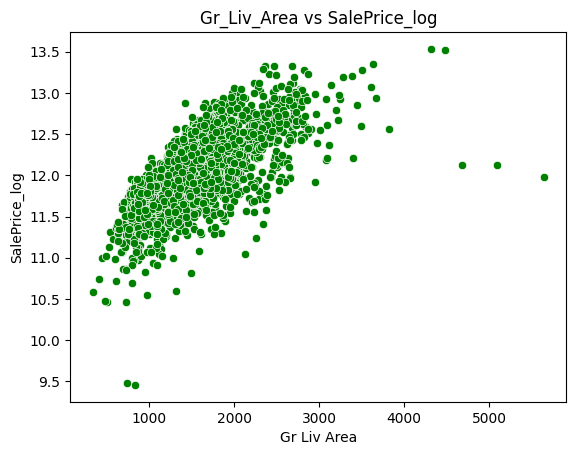

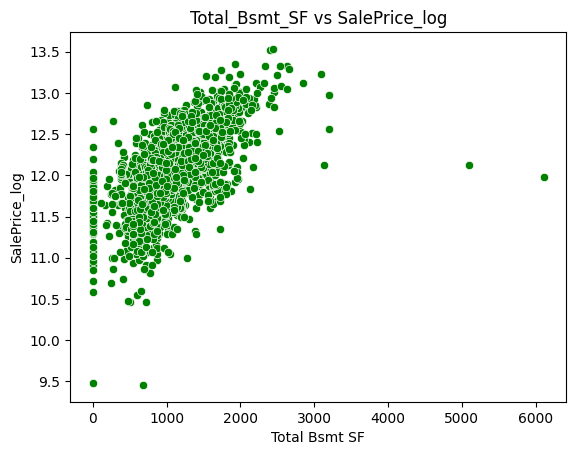

In [12]:
# Scatterplots For Top Continuous Features

# GrLivArea Vs SalePrice_log 
sns.scatterplot(x=df['Gr Liv Area'], y=df['SalePrice_log'], color='green')
plt.title('Gr_Liv_Area vs SalePrice_log')
plt.show()

# TotalBsmtSF vs SalePrice_log
sns.scatterplot(x=df['Total Bsmt SF'], y=df['SalePrice_log'], color='green')
plt.title('Total_Bsmt_SF vs SalePrice_log')
plt.show()

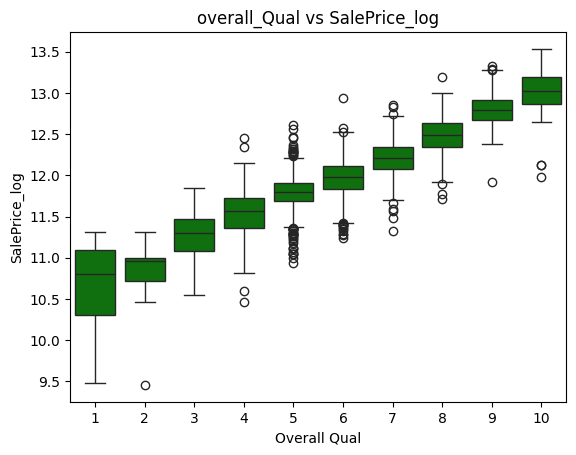

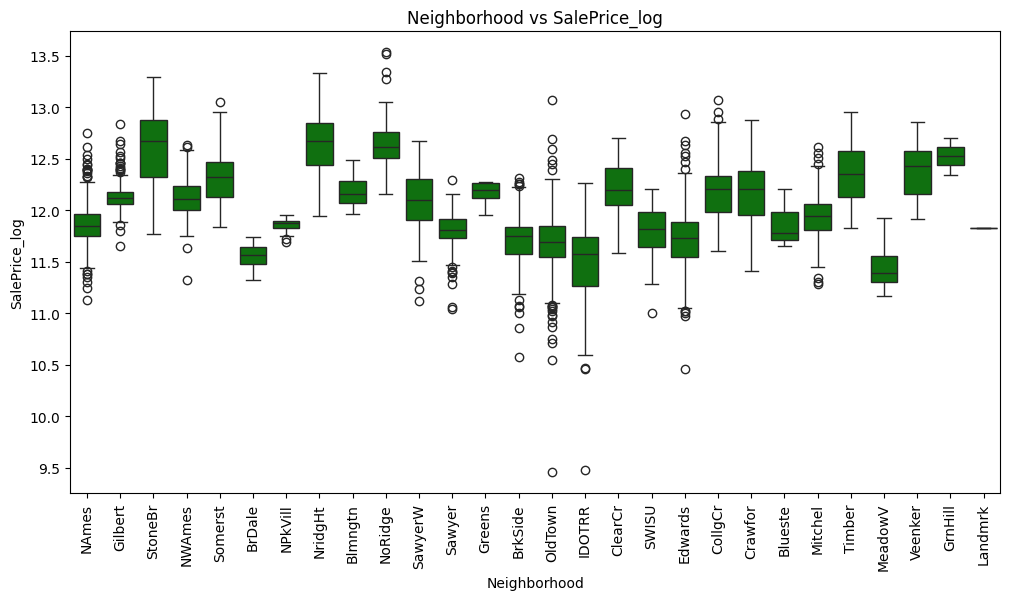

In [13]:
# Boxplots for Top Categorical features 

# OverallQual vs SalePrice_log 
sns.boxplot(x='Overall Qual', y='SalePrice_log', data=df, color='green')
plt.title("overall_Qual vs SalePrice_log")
plt.show()

# Neighborhood vs SalePrice_log
plt.figure(figsize=(12,6))
sns.boxplot(x='Neighborhood', y='SalePrice_log', data=df, color='green')
plt.xticks(rotation=90)
plt.title("Neighborhood vs SalePrice_log")
plt.show()

In [14]:
# Data wrangling 
# Coverting misleading numerics to categorical
df['MS SubClass'] = df['MS SubClass'].astype(str)

# Creating new feature
df['Total Liv Area'] = df['Gr Liv Area'] + df['Total Bsmt SF']

In [15]:
Q1 = df['Gr Liv Area'].quantile(0.25)
Q3 = df['Gr Liv Area'].quantile(0.75)
IQR = Q3 - Q1
upper_limit = Q3 + 1.5 * IQR

# Cap Gr Liv Area at upper limit to reduce skew
df['Gr Liv Area'] = np.where(df['Gr Liv Area'] > upper_limit, upper_limit, df['Gr Liv Area'])

In [16]:
# Replace rare categories with 'Other' for cleaner encoding 
neighborhood_counts = df['Neighborhood'].value_counts()
rare_neighborhoods = neighborhood_counts[neighborhood_counts < 20].index
df['Neighborhood'] = df['Neighborhood'].replace(rare_neighborhoods, 'Other')

In [17]:
# Data Preparation
# Handling the missing values
missing = df.isnull().sum()
missing = missing[missing > 0].sort_values(ascending=False)
print("Columns with missing values:\n", missing)

Columns with missing values:
 Pool QC           2917
Misc Feature      2824
Alley             2732
Fence             2358
Mas Vnr Type      1775
Fireplace Qu      1422
Lot Frontage       490
Garage Finish      159
Garage Qual        159
Garage Cond        159
Garage Yr Blt      159
Garage Type        157
Bsmt Exposure       83
BsmtFin Type 2      81
BsmtFin Type 1      80
Bsmt Cond           80
Bsmt Qual           80
Mas Vnr Area        23
Bsmt Full Bath       2
Bsmt Half Bath       2
Garage Cars          1
Garage Area          1
Electrical           1
Total Bsmt SF        1
Bsmt Unf SF          1
BsmtFin SF 2         1
BsmtFin SF 1         1
Total Liv Area       1
dtype: int64


In [18]:
# Drop columns with more that 15% missing values
threshold = len(df) * 0.15
cols_to_drop = missing[missing > threshold].index
df = df.drop(cols_to_drop, axis = 1)

print(f"Dropped columns: {list(cols_to_drop)}")

Dropped columns: ['Pool QC', 'Misc Feature', 'Alley', 'Fence', 'Mas Vnr Type', 'Fireplace Qu', 'Lot Frontage']


In [19]:
# Fill Remaining Missing Data 

# Seperate categorical and numerical columns
cat_cols = df.select_dtypes(include=['object']).columns
num_cols = df.select_dtypes(include=[np.number]).columns

# Fill categorical columns with mode
for col in cat_cols: 
    if df[col].isnull().sum() > 0:
        df[col].fillna(df[col].mode()[0], inplace=True)

# Fill numerical columns with median 
for col in num_cols:
    if df[col].isnull().sum() > 0:
        df[col].fillna(df[col].median(), inplace=True)

# check 
print("Remaining missing values:", df.isnull().sum().sum())

Remaining missing values: 0


In [20]:
# Encode all cotegorical variables
df = pd.get_dummies(df, drop_first=True)

In [21]:
# Dropping Irrelevant columns
for col in ['PID', 'Order']:
    if col in df.columns:
        df.drop(col, axis=1, inplace=True)
        print(f"Dropped identifier column: {col}")

Dropped identifier column: PID
Dropped identifier column: Order


In [22]:
# Split dependent features and independent features 
x = df.drop(['SalePrice', 'SalePrice_log'], axis = 1)
y = df['SalePrice_log']

In [23]:
# Train and Test split
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=42)

print("Data split complete: ")
print(f"X_train: {x_train.shape}\nX_test: {x_test.shape}")
print(f"Y_train: {y_train.shape}\nY_test: {y_test.shape}")

Data split complete: 
X_train: (2344, 253)
X_test: (586, 253)
Y_train: (2344,)
Y_test: (586,)


In [24]:
# Train a linear Regression model
from sklearn.linear_model import LinearRegression

# Initialize model 
lin_reg = LinearRegression()

# Train on training set 
lin_reg.fit(x_train, y_train)

LinearRegression()

In [25]:
# Predict on test set
y_pred = lin_reg.predict(x_test)

In [26]:
# Evaluation
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# r2 score (close to 1, better.)
r2 = r2_score(y_test, y_pred)

# RMSD (how wrong prediction are??)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"Model Performance: \nr2 score: {r2:.3f} \nRMSE: {rmse:.3f}")

Model Performance: 
r2 score: 0.900 
RMSE: 0.136


In [27]:
# Cross-validation
from sklearn.model_selection import cross_val_score 
from sklearn.metrics import make_scorer, mean_squared_error

# Using negative RMSE as scoring 
def rmse_cv(model, x, y):
    rmse = np.sqrt(-cross_val_score(model, x, y, scoring="neg_mean_squared_error", cv=5))
    return rmse

# Running cross-validation on Linear Regression
lr_rmse_scores = rmse_cv(lin_reg, x, y)

print("Linear Regression Cross-Validated RMSE Scores:", lr_rmse_scores)
print(f"Mean RMSE: {lr_rmse_scores.mean():.4f}, std: {lr_rmse_scores.std():.4f}")

Linear Regression Cross-Validated RMSE Scores: [0.15203801 0.13584866 0.14506209 0.20048161 0.1481041 ]
Mean RMSE: 0.1563, std: 0.0227


In [28]:
# Model comparison
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

# Initialize models
rf = RandomForestRegressor(n_estimators=100, random_state=42)
xgb = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=4, random_state=42)

# Cross-validate each 
rf_rmse_scores = rmse_cv(rf, x, y)
xgb_rmse_scores = rmse_cv(xgb, x, y)

print("Model comparison (5-flod CV RMSE):")
print(f"Linear Regression: {lr_rmse_scores.mean():.4f}")
print(f"Random Forest: {rf_rmse_scores.mean():.4f}")
print(f"XGBoost: {xgb_rmse_scores.mean():.4f}")

Model comparison (5-flod CV RMSE):
Linear Regression: 0.1563
Random Forest: 0.1370
XGBoost: 0.1272


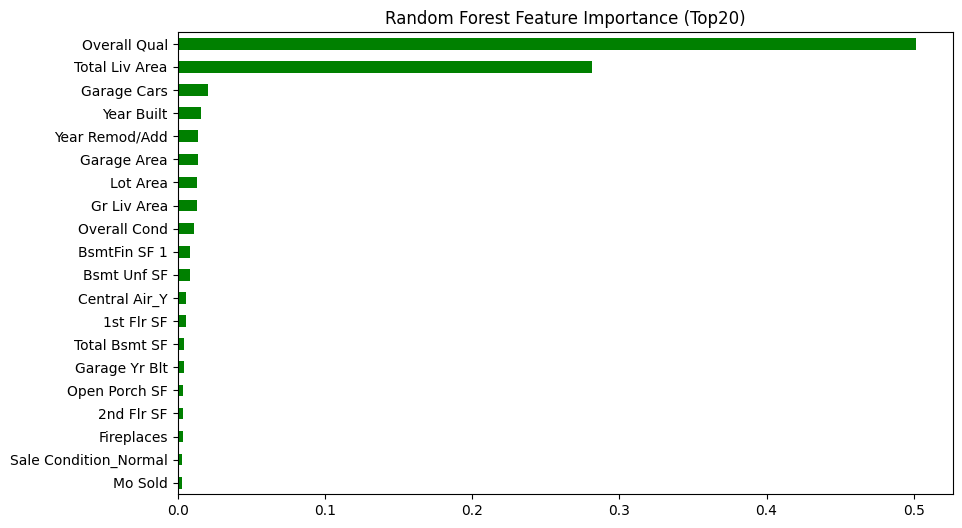

In [29]:
# Random Forest Feature Importance 
rf.fit(x, y)
importance_rf = pd.Series(rf.feature_importances_, index=x.columns)
top_features_rf = importance_rf.sort_values(ascending=False).head(20)

plt.figure(figsize=(10,6))
top_features_rf.plot(kind='barh', color='green')
plt.title("Random Forest Feature Importance (Top20)")
plt.gca().invert_yaxis()
plt.show()

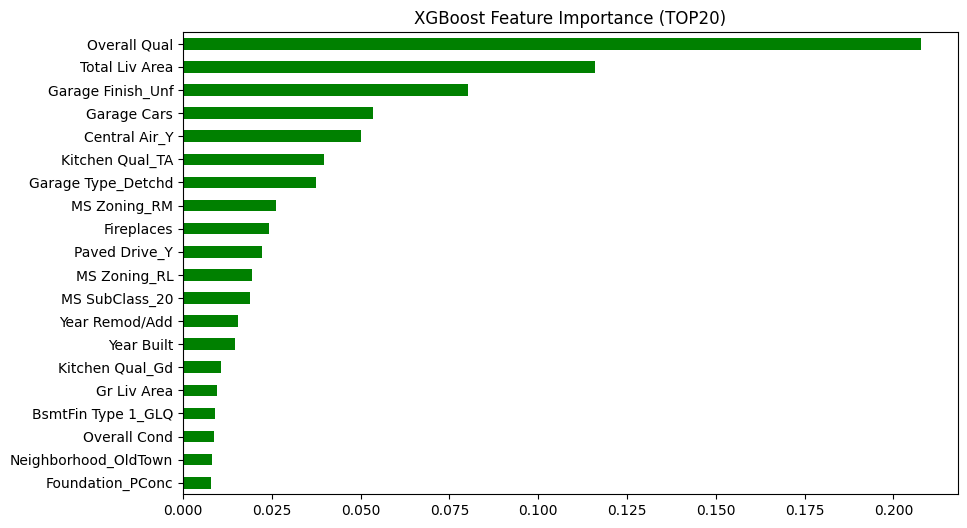

In [30]:
# XGBoost Feature Importance
xgb.fit(x, y)
importances_xgb = pd.Series(xgb.feature_importances_, index=x.columns)
top_features_xgb = importances_xgb.sort_values(ascending=False).head(20)

plt.figure(figsize=(10,6))
top_features_xgb.plot(kind='barh', color='green')
plt.title("XGBoost Feature Importance (TOP20)")
plt.gca().invert_yaxis()
plt.show()